In [1]:
from saibr import *
from matplotlib_polyroi import RoiJupyter
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib notebook

# SAIBR demonstration

- Demonstrating the SAIBR pipeline using dataset 1

- This is a two step process: calibration and correction

- We will perform calibration first using images of untagged C elegans embryos, and then use the calibrated SAIBR model to remove autofluorescence from images of LGL-1 GFP expressing embryos

### Import calibration data

In [2]:
# Load images
cal_basepath = '../data/dataset1/n2'
cal_image_paths = glob.glob(cal_basepath + '/*.tif')
cal_images = [load_image(p) for p in cal_image_paths]

# Extract channels
cal_images_gfp = [i[:, :, 0] for i in cal_images]
cal_images_af = [i[:, :, 1] for i in cal_images]

### Draw ROIs 
Lay points around the embryo circumference on each image (~4 points) and click Save

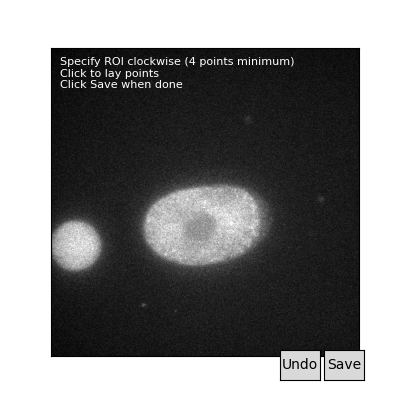

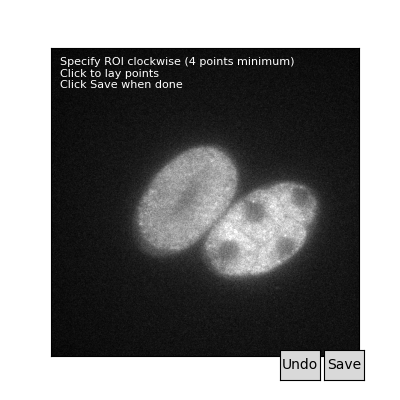

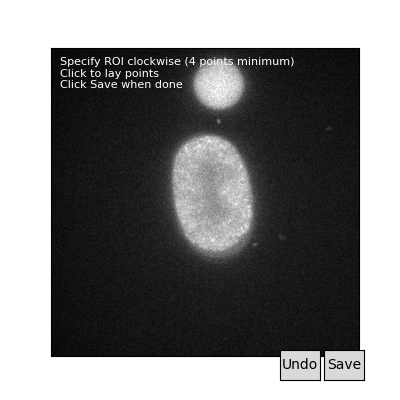

In [3]:
# Create an ROI window for each of the images
roi_windows = []
for i, img in enumerate(cal_images_gfp):
    roi_windows.append(RoiJupyter(img))
    roi_windows[i].run()  

In [4]:
# Store ROIs - DO NOT RUN THIS CELL UNTIL ALL ROIs HAVE BEEN DRAWN AND SAVED!
rois = []
for r in roi_windows:
    rois.append(r.roi)

### Perform calibration

In [5]:
sc = SaibrCalibrate(gfp=cal_images_gfp, af=cal_images_af, roi=rois, sigma=2)
sc.run()

# Print SAIBR parameters
print(sc.params)

[0.9494206231809376, -453.388357098117]


### Plot regression results

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='AF', ylabel='GFP'>)

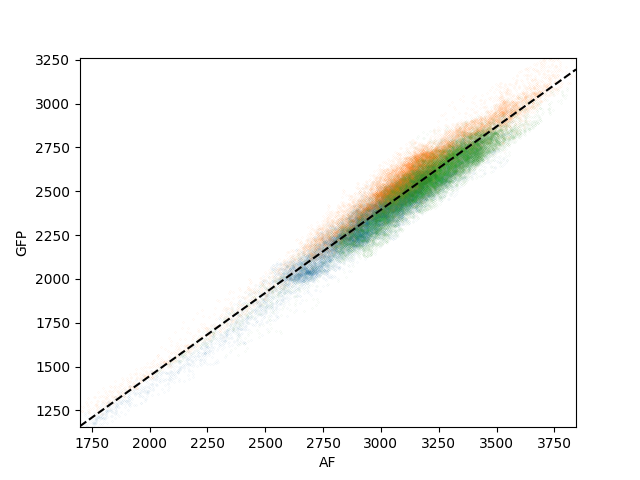

In [6]:
sc.plot_correlation()

### Test SAIBR on calibration data

If SAIBR has been successful, this should reduce calibration images to noise (additional structures in the images such as beads will remain visible)

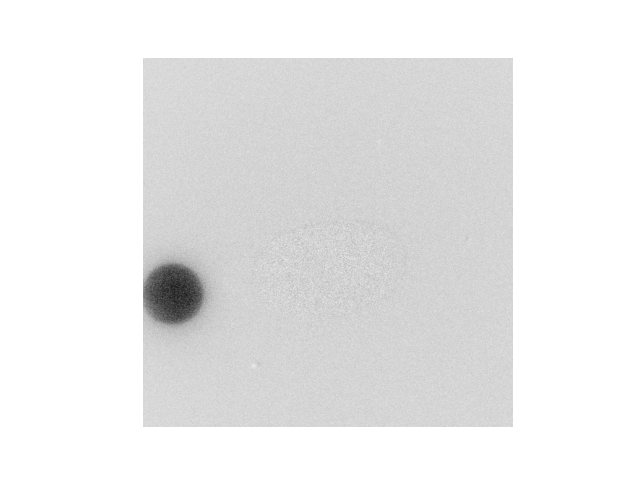

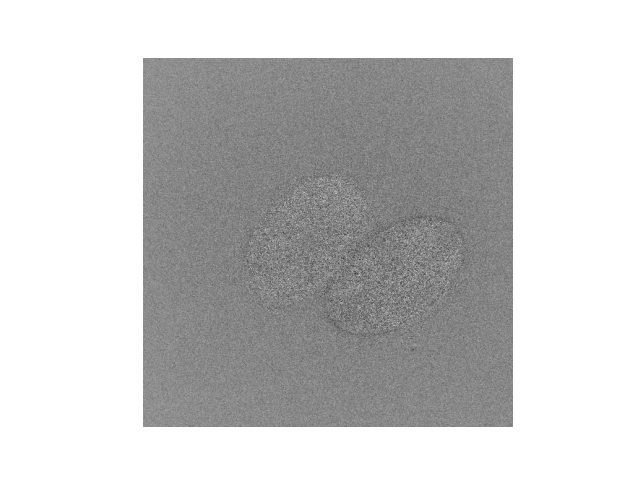

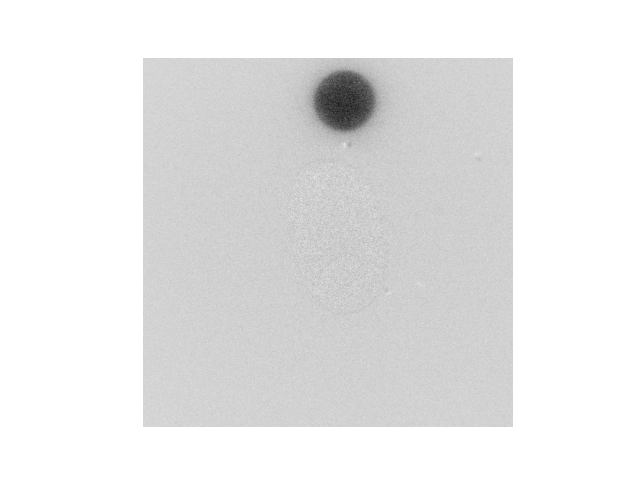

In [7]:
for c1, c2 in zip(cal_images_gfp, cal_images_af):
    img = saibr_correct(c1, c2, *sc.params)
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    ax.axis('off')

### Perform correction on LGL-1 GFP expressing embryos

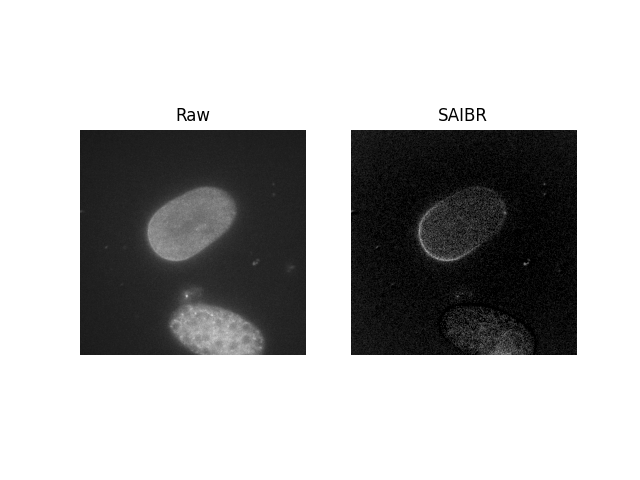

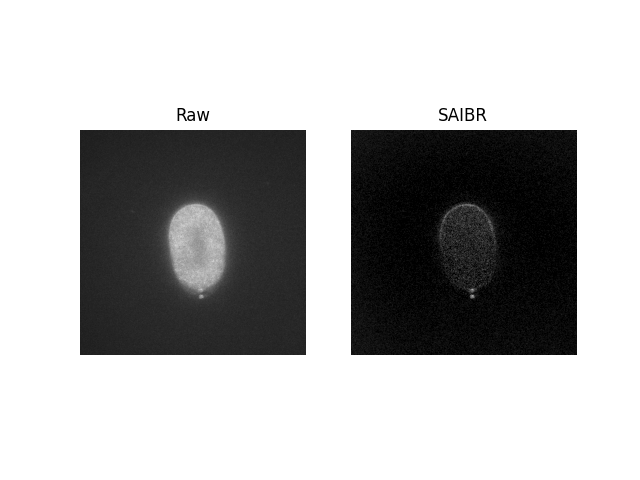

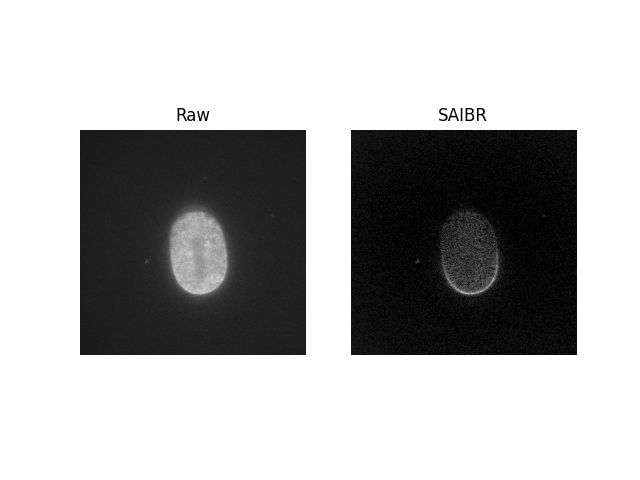

In [8]:
lgl_basepath = '../data/dataset1/lgl_gfp'
lgl_image_paths = glob.glob(lgl_basepath + '/*.tif')
lgl_images = [load_image(p) for p in lgl_image_paths]

for i in lgl_images:
    img = saibr_correct(i[:, :, 0], i[:, :, 1], *sc.params)
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(i[:, :, 0], cmap='gray', vmin=0)
    ax[1].imshow(img, cmap='gray', vmin=0)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].set_title('Raw')
    ax[1].set_title('SAIBR')